In [8]:
import sys
print(sys.executable)

C:\Program Files\Python311\python.exe


In [2]:
import numpy as np

In [3]:
import pandas as pd


In [4]:
import matplotlib.pyplot as plt


In [5]:
import seaborn as sns

In [6]:
import plotly.express as p


In [7]:
import plotly.graph_objects as go

In [8]:
df = pd.read_csv("Zomato data .csv")
print(df.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [9]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


#Convert the data type of the "rate" column to float and remove the denominator

In [10]:
def handleRate(value):
    value =str(value).split('/')
    value = value[0];
    return float(value)
df['rate']=df['rate'].apply(handleRate)
print(df.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


#dataframe Summary

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


No null value we see

#types of resturant

Text(0.5, 0, 'Type Of Returant')

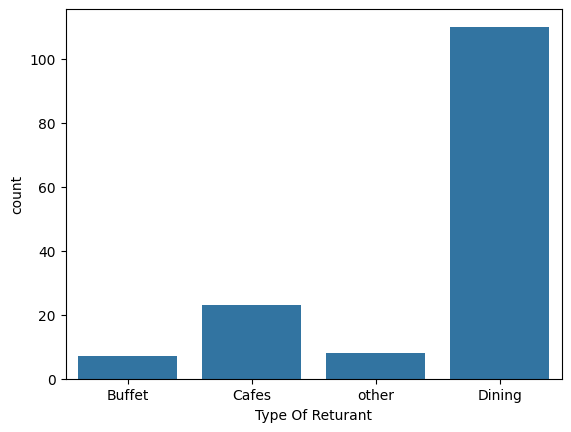

In [13]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel('Type Of Returant')

#Conclusion : The majority of the resturant fall into the dining category 

Text(0, 0.5, 'Votes')

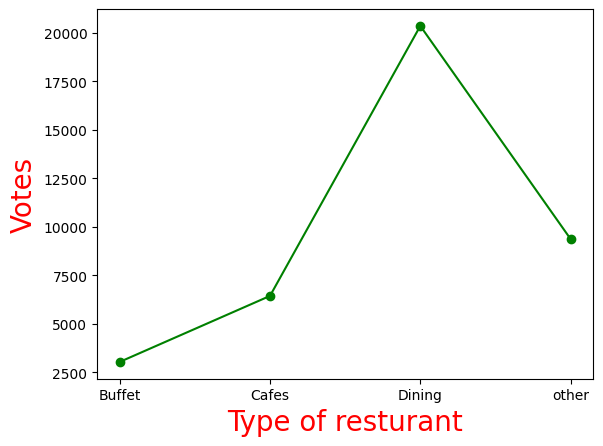

In [17]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes':grouped_data})
plt.plot(result, c="green", marker="o")
plt.xlabel('Type of resturant', c='red', size=20)
plt.ylabel('Votes', c='red', size=20)

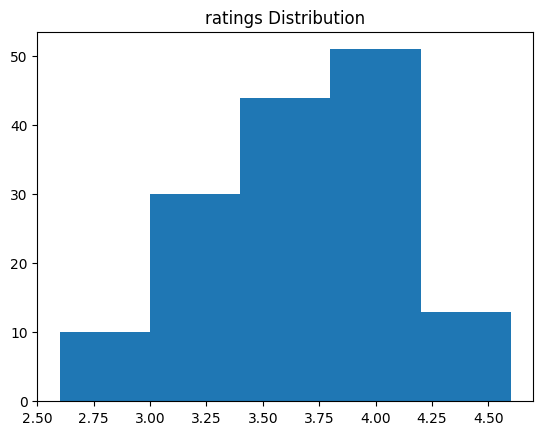

In [19]:
plt.hist(df['rate'],bins = 5)
plt.title("ratings Distribution")
plt.show()

# RATING = 3.5 to 4
# the majority of couples prefer resturant with an approximate cost of 300 

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

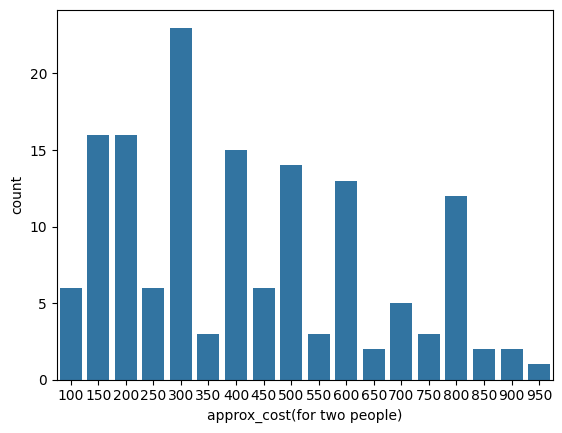

In [20]:
couple_data=df['approx_cost(for two people)']
sns.countplot(x=couple_data)

# online order vs offline order

<Axes: xlabel='online_order', ylabel='rate'>

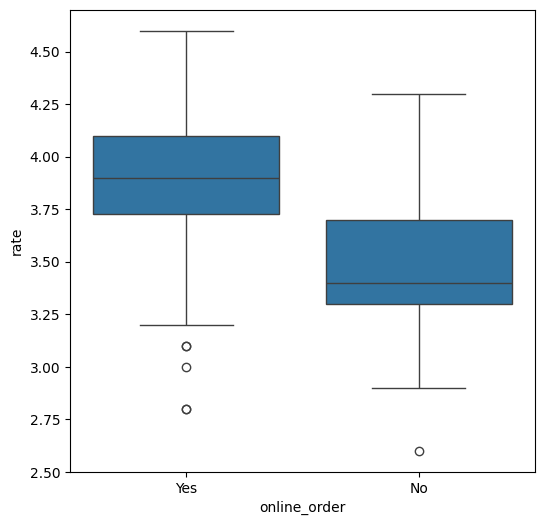

In [21]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y= 'rate',data = df)

# offline order got less rating in compare to online order

In [24]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


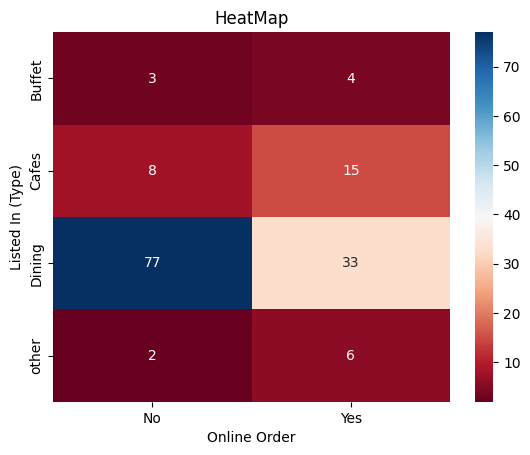

In [27]:
pivot_table = df.pivot_table(index='listed_in(type)',columns='online_order', aggfunc ='size', fill_value =0)
sns.heatmap(pivot_table,annot = True, cmap ='RdBu', fmt='d')
plt.title('HeatMap')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.show()


# Dining resturant primarily accept offline order while cafe recieve online orders 